In [119]:
import pandas as pd
import numpy as np

In [120]:
#Reading the dataset
obs=pd.read_csv("Obesity prediction.csv")
obs.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [121]:
#Checking if any values are missing
obs.isna().sum()

Gender            0
Age               0
Height            0
Weight            0
family_history    0
FAVC              0
FCVC              0
NCP               0
CAEC              0
SMOKE             0
CH2O              0
SCC               0
FAF               0
TUE               0
CALC              0
MTRANS            0
Obesity           0
dtype: int64

In [122]:
#Converting categorical features into numericals

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

catgo=['Gender','family_history','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS','Obesity']
onehot=OneHotEncoder()
coltrans=ColumnTransformer([('one_hot',
                          onehot,
                          catgo)],
                          remainder='passthrough')
#Turning into numericals
trans_obs=coltrans.fit_transform(obs)
trans_obs

array([[1.      , 0.      , 0.      , ..., 2.      , 0.      , 1.      ],
       [1.      , 0.      , 0.      , ..., 3.      , 3.      , 0.      ],
       [0.      , 1.      , 0.      , ..., 2.      , 2.      , 1.      ],
       ...,
       [1.      , 0.      , 0.      , ..., 2.054193, 1.414209, 0.646288],
       [1.      , 0.      , 0.      , ..., 2.852339, 1.139107, 0.586035],
       [1.      , 0.      , 0.      , ..., 2.863513, 1.026452, 0.714137]],
      shape=(2111, 38))

In [123]:
#Correlation matrix
onehot.fit(obs[catgo])
column_names = (onehot.get_feature_names_out(catgo)).tolist() + obs.drop(columns=catgo).columns.tolist()
# Create the transformed DataFrame
trans_obs = pd.DataFrame(trans_obs, columns=column_names)
# Compute the correlation matrix
corr_matrix = trans_df.corr()
print(corr_matrix)

                              Gender_Female  Gender_Male  family_history_no  \
Gender_Female                      1.000000    -1.000000           0.102512   
Gender_Male                       -1.000000     1.000000          -0.102512   
family_history_no                  0.102512    -0.102512           1.000000   
family_history_yes                -0.102512     0.102512          -1.000000   
FAVC_no                            0.064934    -0.064934           0.208036   
FAVC_yes                          -0.064934     0.064934          -0.208036   
CAEC_Always                       -0.019296     0.019296           0.073189   
CAEC_Frequently                    0.123224    -0.123224           0.269018   
CAEC_Sometimes                    -0.071790     0.071790          -0.340981   
CAEC_no                           -0.062930     0.062930           0.189341   
SMOKE_no                           0.044698    -0.044698           0.017385   
SMOKE_yes                         -0.044698     0.04

In [124]:
#Viewing the dataframe created
trans_obs.head(10)

,Gender_Female,Gender_Male,family_history_no,family_history_yes,FAVC_no,FAVC_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,...,Obesity_Overweight_Level_I,Obesity_Overweight_Level_II,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0
3,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0
5,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,29.0,1.62,53.0,2.0,3.0,2.0,0.0,0.0
6,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,23.0,1.50,55.0,3.0,3.0,2.0,1.0,0.0
7,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,22.0,1.64,53.0,2.0,3.0,2.0,3.0,0.0
8,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,24.0,1.78,64.0,3.0,3.0,2.0,1.0,1.0
9,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,22.0,1.72,68.0,2.0,3.0,2.0,1.0,1.0


<Axes: >

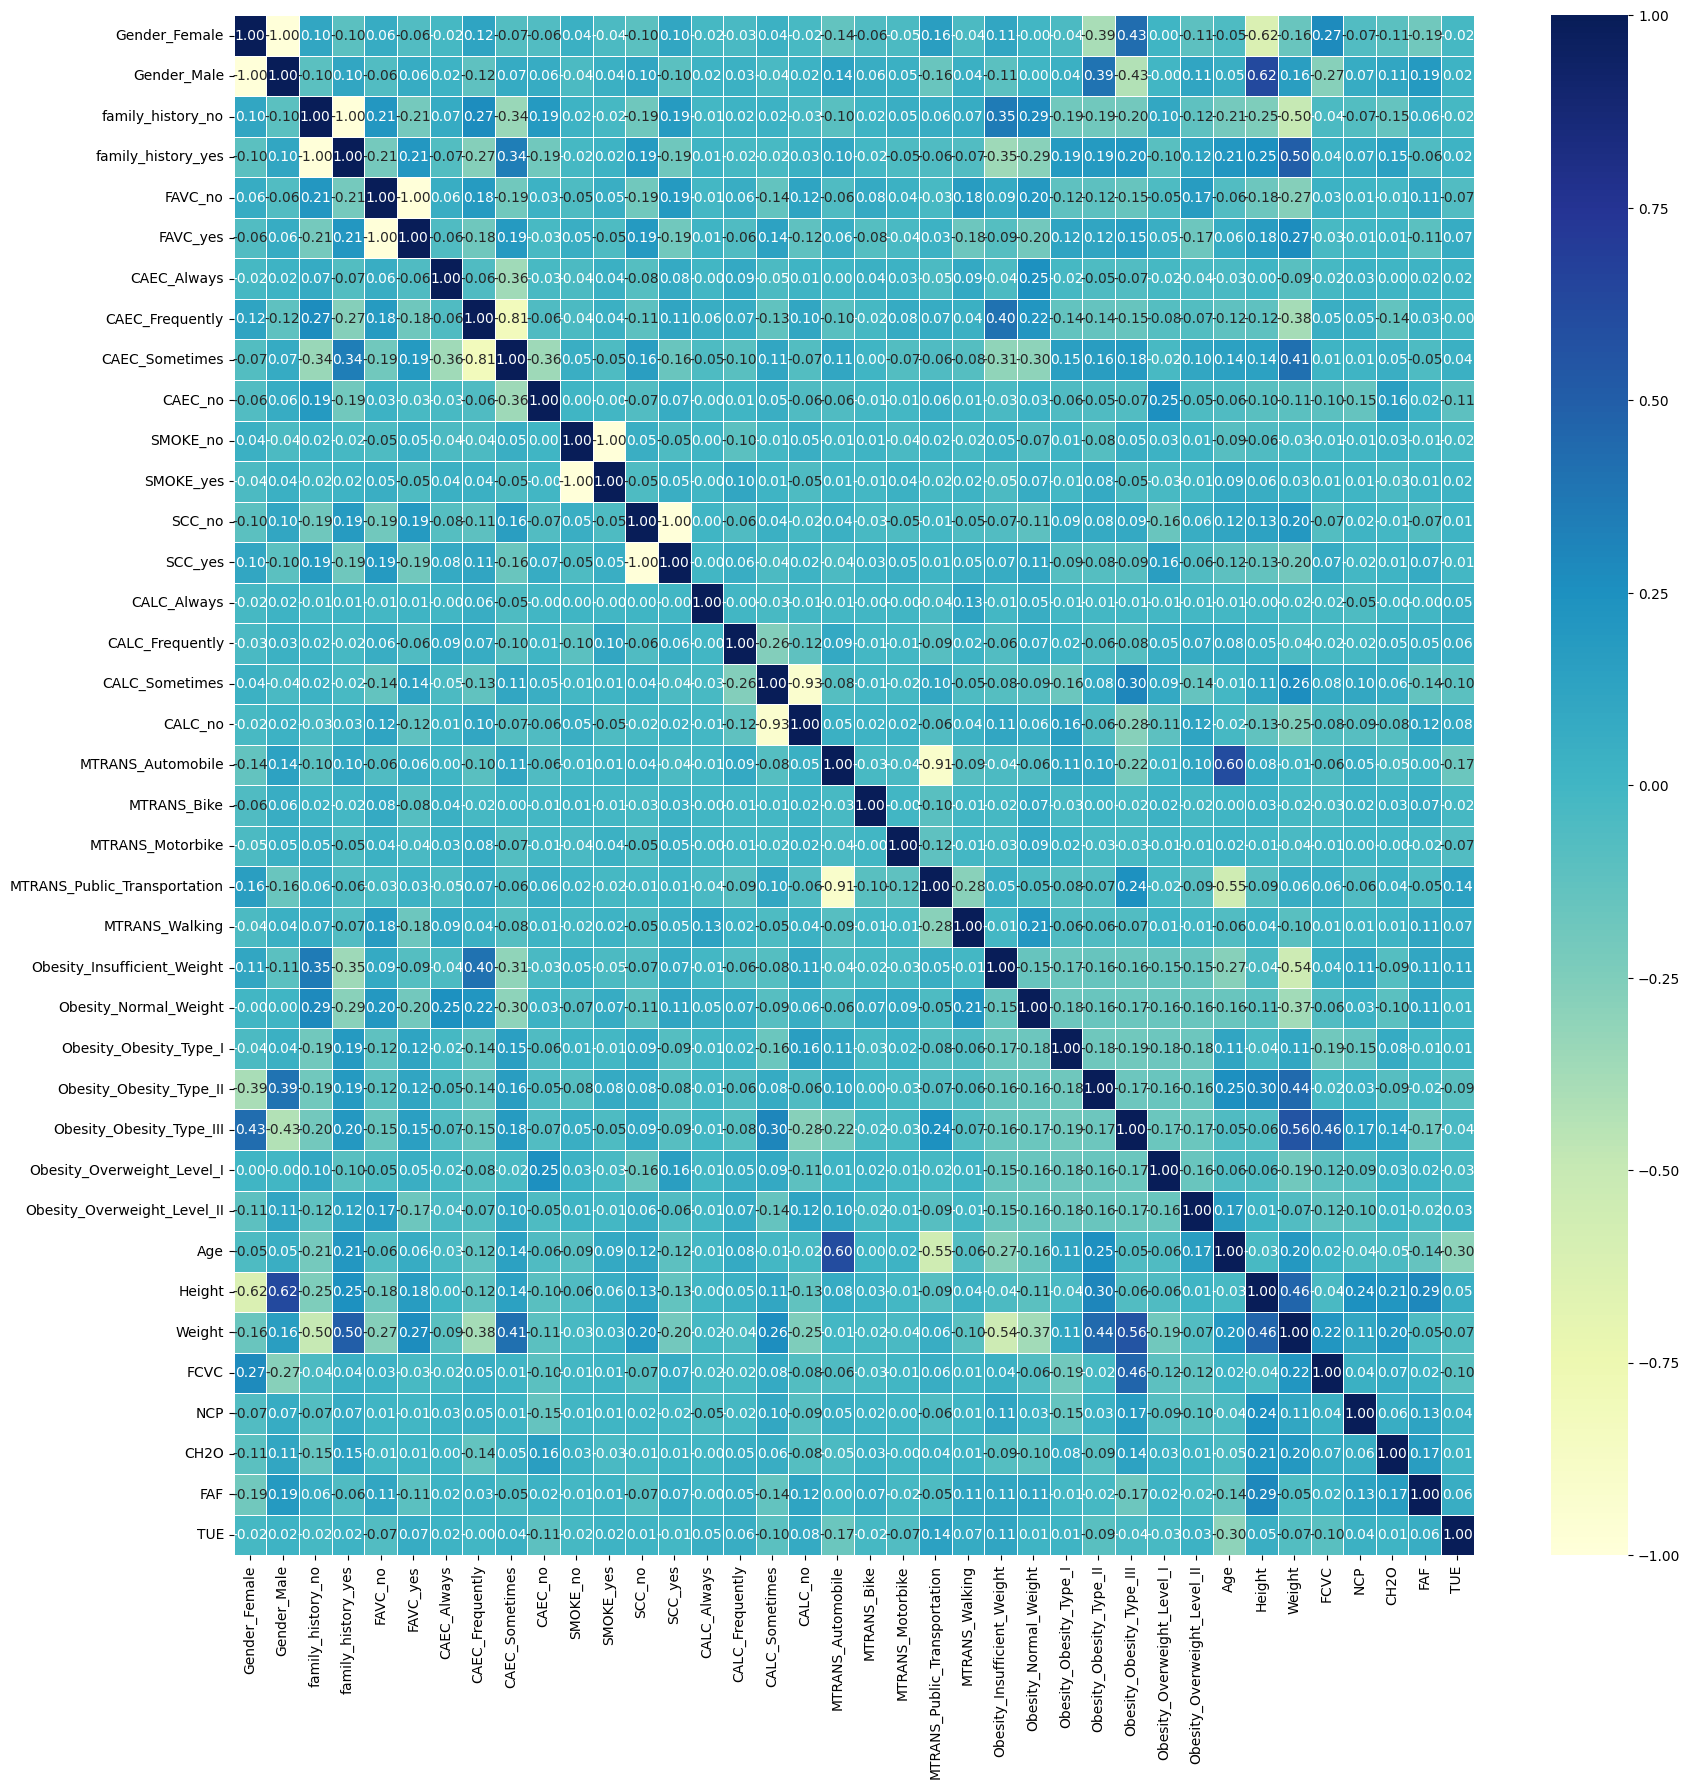

In [125]:
#Correlation matrix visual representation
import seaborn as sns
corr_matrix=trans_obs.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix,annot=True,linewidth=0.5,fmt=".2f",cmap='YlGnBu')

In [126]:
#Predicting which factor provies high contribution to different types of obesity:

from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split

#Defining a function for prediction
def train_tests(target):
    np.random.seed(18)
    print('TARGET:',target)
#Splitting the data into features and label
    x=trans_obs.drop(target,axis=1)
    y=trans_obs[target]

#Splitting train and test set
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

#Creating a model
    model=RandomForestClassifier()

#Training the model
    model.fit(xtrain,ytrain)

    print(f'Score of model {model.score(xtest,ytest)}')

#List contains the importance of each feature causing particular obesity:
    list = model.feature_importances_
    imp=pd.DataFrame(list,index=x.columns,columns=['Importance'])
#Sorting in descending order
    imp=imp.sort_values(by='Importance',ascending=False)
    print(imp)
    print('-------------------------------------------------\n')

In [127]:
#Different types of obesity:
tcol=['Obesity_Insufficient_Weight',
      'Obesity_Normal_Weight',
      'Obesity_Obesity_Type_I',
      'Obesity_Obesity_Type_II',
      'Obesity_Obesity_Type_III',
      'Obesity_Overweight_Level_I',
      'Obesity_Overweight_Level_II']

In [118]:
for i in range (0,7):
    train_tests(tcol[i])

TARGET: Obesity_Insufficient_Weight
Score of model 0.9976359338061466
                              Importance
Weight                          0.368091
Obesity_Normal_Weight           0.099027
NCP                             0.069644
Age                             0.064686
CAEC_Frequently                 0.053758
Height                          0.052799
FAF                             0.031805
family_history_no               0.025261
family_history_yes              0.025202
TUE                             0.024484
FCVC                            0.023380
CAEC_Sometimes                  0.022061
CH2O                            0.019714
Obesity_Overweight_Level_I      0.018530
Gender_Male                     0.014575
MTRANS_Automobile               0.012569
Gender_Female                   0.011802
CALC_no                         0.010408
MTRANS_Public_Transportation    0.008016
CALC_Sometimes                  0.006548
Obesity_Obesity_Type_I          0.006018
Obesity_Overweight_Level_II 